<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 - Tipología y ciclo de vida de los datos aula 1 · Práctica 1</p>
<p style="margin: 0; text-align:right;">2018 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right;">Prof. Colaboradora: <b>Mireia Calvo Gonzalez</b></p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Alumno: <b>Fernando Antonio Barbeiro Campos</b> - <a href="">fbarbeiro@uoc.edu</a></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>
<center><h1>Práctica 2 - Limpieza y validación de los datos</h1></center>


## 1. Dataset
*Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?*

He elegido el dataset ["**Titanic: Machine Learning from Disaster**" de Kagle](https://www.kaggle.com/c/titanic/overview). La información presente en el dataset són datos sobre cada pasajero del famoso naufragio, si la persona sobrevivió o no, su sexo, tipo de cabina que estaba, entre otros.

Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

Justamente, el problema que buscamos a contestar es precisamente esto: hacer el análisis de **¿qué tipos de personas podrían sobrevivir?**


## 2. Integración y selección de los datos de interés a analizar

Antes de empezar con la selección de los datos propiamente dicha, voy a buscar un poco más de información respeto al dataset.

In [1]:
# Objetivo: Asegurar que estamos trabajando con el formato en ingles separado por comas
L <- readLines("train.csv", n = 1)
if (grepl(",", L)) print("File has an English format")

[1] "File has an English format"


In [2]:
# Como estamos trabajando con ficheros separados por commas, vamos a mirar un poco de datos
df <- read.csv("train.csv")
head(df)

# Mirando los nombres de columnas del dataframe y los tipos de variables
print(paste("We are evaluating", nrow(df), "rows of code"))
print("Column's names: ")
colnames(df)
sapply(df,class)
str(df)
summary(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


[1] "We are evaluating 891 rows of code"
[1] "Column's names: "


[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

PassengerId    Survived      Pclass        Name         Sex         Age 
  "integer"   "integer"   "integer"    "factor"    "factor"   "numeric" 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
  "integer"   "integer"    "factor"   "numeric"    "factor"    "factor"

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

Ahora que tenemos un poco más de información sobre el dataset, detectamos que algunas de las columnas no aportan mucho para el tipo de conocimiento que necesitamos recolectar. Por ejemplo, el número del *ticket* de cada persona es bastante irrelevante para extraer un modelo y predecir si la persona ha sobrevivido o no. Dicho, con el intuito de obtener un modelo significativo, he elegido los siguientes atributos para el analisis:
- *Survived*
- *Pclass*
- *Name*
- *Sex*
- *Age*

Queda claro que el atributo **Name** tampoco es relevante, pero mantuve por si acaso necesito explicar o hacer alguna comparación de pasajeros (será más sencillo identificar las personas por sus nombres). 

Definidos los atributos, antes de seguir para el próximo ejercício, hago la selección de los datos que vamos a trabajar abajo.

In [3]:
df <- df[,2:6] 
head(df)

Survived,Pclass,Name,Sex,Age
0,3,"Braund, Mr. Owen Harris",male,22
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38
1,3,"Heikkinen, Miss. Laina",female,26
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35
0,3,"Allen, Mr. William Henry",male,35
0,3,"Moran, Mr. James",male,NA


## 3. Limpieza de los datos

### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?

In [4]:
# Como resultado del comando abajo, podemos ver que solamente Age tiene elementos NA
unlist(lapply(df, function(x) any(is.na(x))))

# Abajo comentaré las aproximaciones posibles para el escenario y la adoptada              
df_no_NA <- df[rowSums(is.na(df)) == 0,]
nrow(df_no_NA)
options(warn=-1)             
for(i in 1:ncol(df)){
  df[is.na(df[,i]), i] <- mean(df[,i], na.rm = TRUE)
}
options(warn=0)          
unlist(lapply(df, function(x) any(is.na(x))))
nrow(df)

Survived   Pclass     Name      Sex      Age 
   FALSE    FALSE    FALSE    FALSE     TRUE

[1] 714

Survived   Pclass     Name      Sex      Age 
   FALSE    FALSE    FALSE    FALSE    FALSE

[1] 891

Como podemos notar, solamente la columna **Age** presentaba **datos vacíos**. Además, la cantidad de registros que estamos trabajando tampoco es masiva, es decir, **tenemos un muestreo pequeño de datos (891 registros)**.

Esto básicamente motiva con que no adoptaramos una aproximación posible en los casos de datos vacíos (NA):

- **Eliminación de registros (filas) donde haya a ocurrencia de NAs**

Como podemos ver en el dataset `df_no_NA`, quedaríamos simplemente con `714` filas para trabajar (particularmente he considerado poco), por lo tanto, he adoptado una aproximación distinta:

- **Calcular un pormedio basado en la información de las otras filas para los casos donde hubiera un elemento vacío**

Finalmente había un registro NA en la última línea del comando `head(df)` (*Moran, Mr. James*) veamos como ha quedado los datos de Age ahora:

In [5]:
head(df)

Survived,Pclass,Name,Sex,Age
0,3,"Braund, Mr. Owen Harris",male,22.00000
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000
1,3,"Heikkinen, Miss. Laina",female,26.00000
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000
0,3,"Allen, Mr. William Henry",male,35.00000
0,3,"Moran, Mr. James",male,29.69912


Para cerrar el tema de los *Missing Values*, hay otras aproximaciones que no parecían adecuadas para el escenario, sin embargo añado para dejar claro que las he tenido en cuenta:

- **Rellenar manualmente los valores que faltan**
- **Rellenar con una constante global**
- **Rellenar con un valor más probable (podría ser echo con una regresión, por ejemplo)**


### 3.2. Identificación y tratamiento de valores extremos

La verdad es que, mismo antes de seguir con el analisis si hay o no valores extremos (*outliers*) queda evidente que hay pocas posibilidades de haber muchos problemas, dado que tenemos simplemente 3 columnas con valores numericos (siendo una de ellas, la columna de **Survived** que es precisamente la columna del *label* del dataset - o sea, ahí seguramente que no habrá problemas).

In [6]:
sapply(df,class)

Survived    Pclass      Name       Sex       Age 
"numeric" "numeric"  "factor"  "factor" "numeric"

[1] 80

[1] 0.42

[1]  0.42000 22.00000 29.69912 35.00000 80.00000

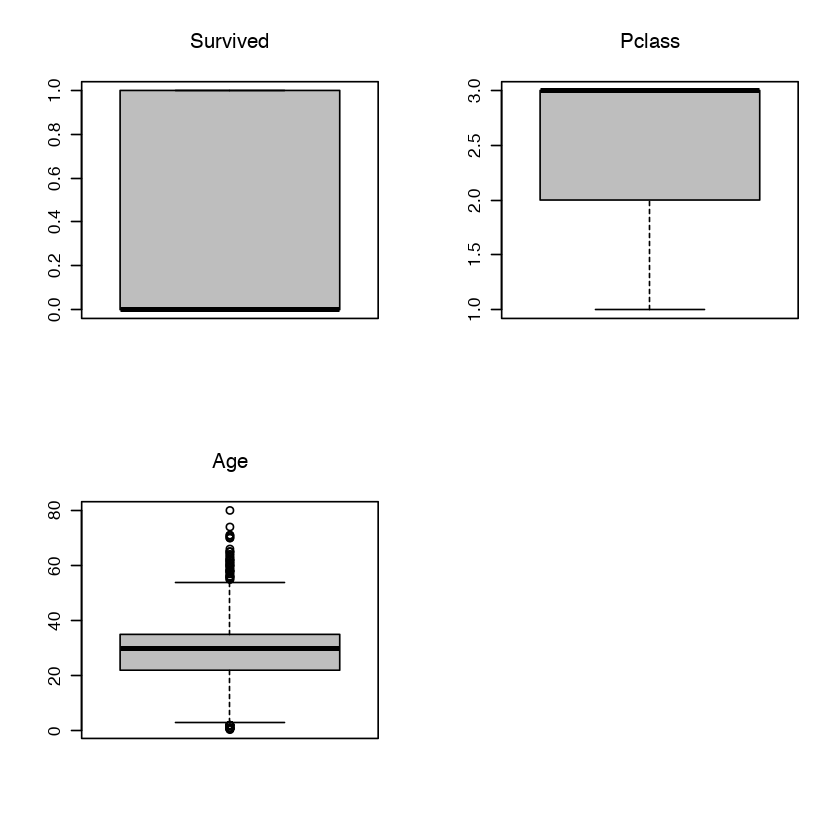

In [7]:
par(mfrow=c(2,2))
for(i in 1:ncol(df)) {
    if (is.numeric(df[,i])){
        boxplot(df[,i], main = colnames(df)[i], width = 100, col="gray")
    }
}

max(df$Age, na.rm = TRUE)
min(df$Age, na.rm = TRUE)
fivenum(df$Age)

Con esto, hay valores que aparecen en los boxplots como *outliers* en **Age**, y es completamente factible que una persona en el Titanic tuviera `80` años (y también `0.4` años, en el caso de un bebé). 

**Los outliers afectan especialmente a la media (medida poco robusta). Y cuando la muestra es pequeña como en nuestro, el efecto se nota aún más acentuado.**

Como forma de tratamiento de valores extremos, una posible aproximación es la tecnica de *Binning* (discretización) que creo ser perfecta para la columna en cuestión.

In [8]:
df$Age <- as.factor(ifelse(df$Age >= 21, "Adult", "Underage"))
sapply(df,class)
tail(df)

Survived    Pclass      Name       Sex       Age 
"numeric" "numeric"  "factor"  "factor"  "factor"

,Survived,Pclass,Name,Sex,Age
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,Adult
887,0,2,"Montvila, Rev. Juozas",male,Adult
888,1,1,"Graham, Miss. Margaret Edith",female,Underage
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Adult
890,1,1,"Behr, Mr. Karl Howell",male,Adult
891,0,3,"Dooley, Mr. Patrick",male,Adult


Explicando el enfoque: 

Como en algunas ocasiones, la información tiene un poco de *ruido*, nos interesa reducir al máximo lo mismo y, para ello, una posible solución es discretizar. Así, una serie de valores son los representantes de la variable cuantitativa (en nuestro caso *Underage* y *Adult* son los representantes).

Otras aproximaciones y tecnicas también podrían estar empleadas aquí, como *Regression* u *Outlier Analysis*, sin embargo, la que haría más sentido para lo que buscamos es si duda el *Binning*.

## 4. Análisis de los datos

### 4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar)

### 4.2. Comprobación de la normalidad y homogeneidad de la varianza

### 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc.

## 5. Representación de los resultados a partir de tablas y gráficas

## 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?


## 7. Código